In [1]:
!pip install yfinance
!pip install python-bcb

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bcb import sgs

In [6]:
def simula_carteira(ativos, pesos, inicio, fim, compras, vendas, capital_inicial=100000):

    dados_ativos = yf.download(ativos, start=inicio, end=fim)['Close']
    benchmark = yf.download('^BVSP', start=inicio, end=fim)['Close']
    dolar = yf.download("USDBRL=X", start=inicio, end=fim)['Close']
    cdi = sgs.get(432, inicio, fim)['432']

    dados_ativos = dados_ativos.dropna()

    #Alocação e Qtdes iniciais
    precos_iniciais = dados_ativos.iloc[0]
    alocacao_inicial = capital_inicial * np.array(pesos)
    qtd_inicial = alocacao_inicial / precos_iniciais

    #Evolução do patrimônio e de outros indicadores
    patrimonio = dados_ativos * qtd_inicial
    dataframe = pd.DataFrame()
    dataframe['Portfolio'] = patrimonio.sum(axis=1)
    dataframe['Ibovespa'] = benchmark
    dataframe['Dolar'] = dolar
    dataframe['CDI'] = ((1 + cdi / 100) ** (1 / 252)).cumprod()

    #Caixa para aportes
    dataframe['Caixa'] = 10000

    #Compras
    dataframe.loc[compras[2]:, 'Caixa'] -= compras[1] * dados_ativos.loc[compras[2], compras[0]]
    dataframe.loc[compras[2]:, 'Portfolio'] += compras[1] * dados_ativos.loc[compras[2], compras[0]]

    #Vendas
    dataframe.loc[vendas[2]:, 'Caixa'] += vendas[1] * dados_ativos.loc[vendas[2], vendas[0]]
    dataframe.loc[vendas[2]:, 'Portfolio'] -= vendas[1] * dados_ativos.loc[vendas[2], vendas[0]]

    #Resultado
    dataframe = dataframe.dropna()
    (dataframe / dataframe.iloc[0])[['Portfolio', 'Ibovespa', 'Dolar', 'CDI']].plot(figsize=(15, 5))
    plt.show()

/tmp/ipython-input-6-3067637987.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_ativos = yf.download(ativos, start=inicio, end=fim)['Close']
[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-6-3067637987.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download('^BVSP', start=inicio, end=fim)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-6-3067637987.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dolar = yf.download("USDBRL=X", start=inicio, end=fim)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-6-3067637987.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9000.22461414 9000.22461414 9000.22461414 ... 9000.22461414 9000.22461414


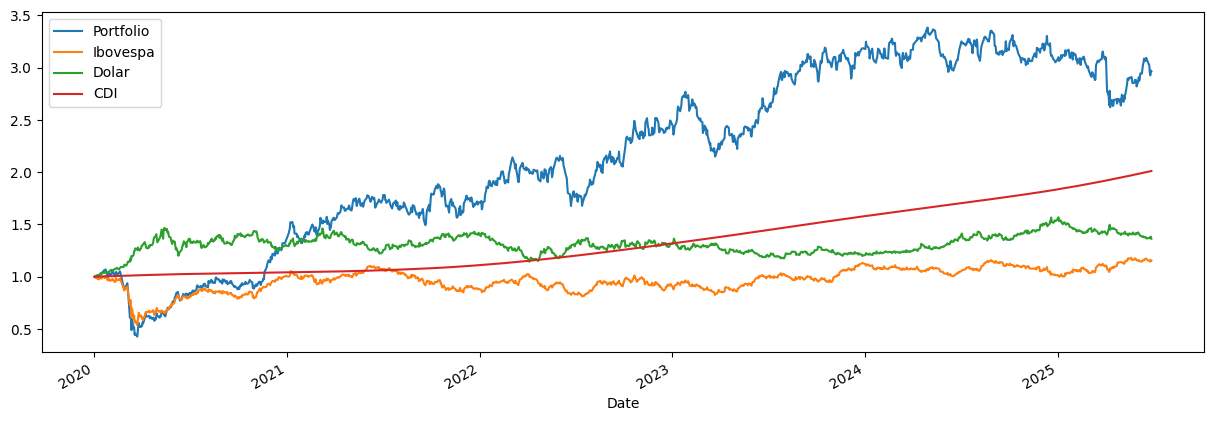

In [7]:
simula_carteira(['PETR4.SA', 'VALE3.SA', 'GGBR4.SA', 'PRIO3.SA'], [0.25,0.35,0.20,0.20], '2020-01-01', '2025-06-30', ['PETR4.SA', 150, '2021-03-03'], ['PRIO3.SA', 50, '2022-05-12'])